<image src="https://i.imgur.com/m2xbBCS.jpeg" width=100%>

# <font color="00CED1"><center> **Hands-On Sesión 9: Imágenes Térmicas 📚🌡️** </center></font>

## <font color='#4C5FDA'> **Contenido**</font>

[**1. Introducción a las imágenes térmicas**](#tema1)

[**2. Ley de Planck**](#tema2)

[**3. Ley de Desplazamiento de Wein**](#tema3)

[**4. Ley de Kirchoff para la emisividad**](#tema4)


In [1]:
#@title **Importamos librerías**
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from google.colab import files
import urllib.request
from PIL import Image
import os
import requests
from io import BytesIO

# <font color="00CED1"> **Introducción a las imágenes térmicas** </font><a name="tema5"></a>

- Todos los objetos emiten radiación termica.
- Una cámara infrarroja detecta y captura la energía infrarroja de los objetos. La cámara convierte la energía infrarroja en una imagen visible y detecta el calor de la superficie que observa.


## **¿Qué es una imágen infrarroja o térmica?**
Una imagen infrarroja representa la radiación emitida por un objeto en función de su temperatura.

<div align=center><img src = 'https://www.pulsar-nv.com/data/public/uploads/2020/06/spektralnyi-diapazon.png' height='500'></div>

## **¿Qué es NIR, SWIR, MWIR, LWIR, y FIR?**
- **NIR (Near Infrared)** Luz que posee una longitud de onda entre 780 nm - 1000 nm.

- **SWIR (Short Wave Infrared)** Luz que posee una longitud de onda entre 1000 nm - 3000 nm.

- **MWIR (Mid Wave Infrared)** Luz que posee una longitud de onda entre 3000 nm - 8000 nm.

- **LWIR (Long Wave Infrared)** Luz que posee una longitud de onda entre 8000 nm - 14000 nm.

- **FIR (Far Infrared)** Luz que posee una longitud de onda entre 14000 nm - 1.000.000 nm.

## <font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font> #<font color="#0000FF">1</font>** 💪</font>   

Carga la imagen infrarroja que quieras o usa una de las disponibles y saca tus conclusiones.

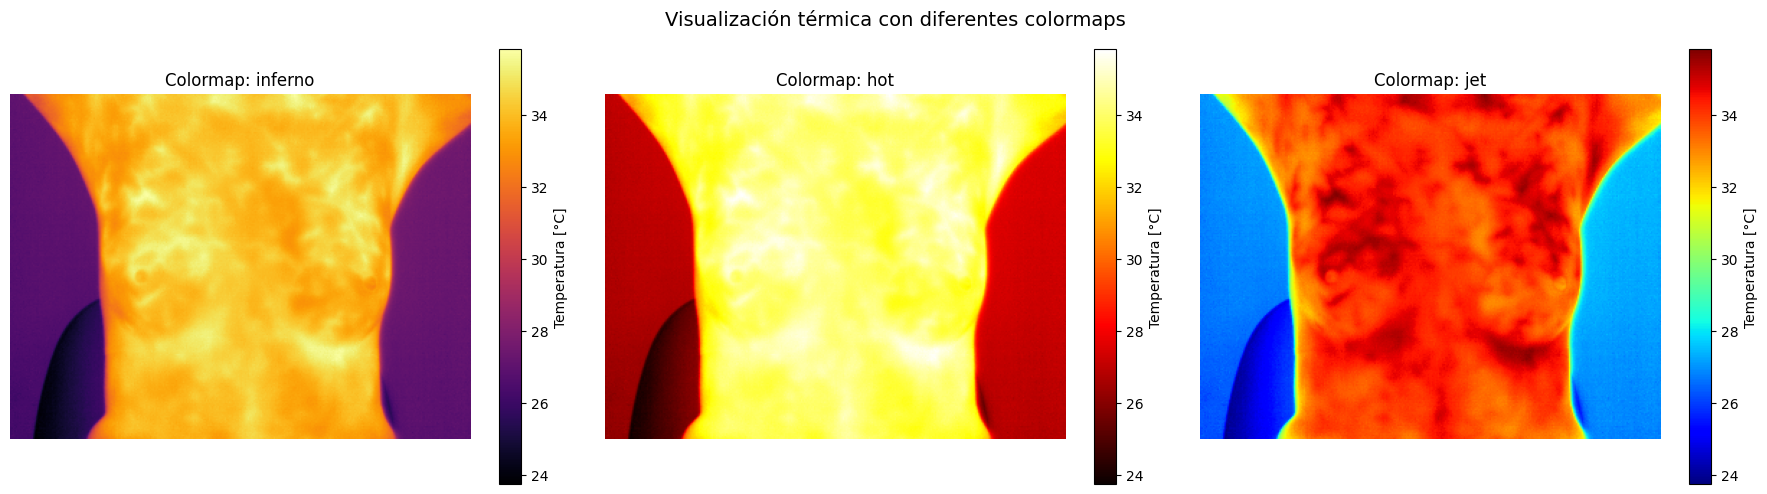

In [2]:
# Nombre de la imagen en GitHub
nombre_imagen = "breast_thermography_1.tiff"
#Imágenes disponibles: breast_thermography_1.tiff, breast_thermography_2.tiff

# URL de la imagen en tu repositorio
url_imagen = f"https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/sesiones/sesion9/images/{nombre_imagen}"

try:
    # Intentar descargar la imagen
    response = requests.get(url_imagen)
    response.raise_for_status()  # Lanza error si falla

    # Cargar imagen en memoria
    imagen_pil = Image.open(BytesIO(response.content))
    imagen_array = np.array(imagen_pil)

    # Definir los mapas de color a usar
    colormaps = ['inferno', 'hot', 'jet']

    # Mostrar la imagen con los tres colormaps
    plt.figure(figsize=(18, 5))

    for i, cmap in enumerate(colormaps):
        plt.subplot(1, 3, i+1)
        plt.imshow(imagen_array, cmap=cmap)
        plt.colorbar(label='Temperatura [°C]')
        plt.title(f"Colormap: {cmap}")
        plt.axis('off')

    plt.suptitle("Visualización térmica con diferentes colormaps", fontsize=14)
    plt.tight_layout()
    plt.show()

except requests.exceptions.RequestException:
    print("⚠️ No se pudo descargar la imagen. Verifica el nombre o la URL.")

# <font color="00CED1"> **Ley de Planck** </font><a name="tema2"></a>
La Ley de Planck describe cómo la cantidad de radiación electromagnética emitida por un cuerpo negro varía con la longitud de onda a una temperatura dada. Se expresa como:

$$ B(\lambda, T) = \frac{2hc^2}{\lambda^5} \cdot \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1} $$

Donde:

- $B(\lambda, T)$ es la radiancia espectral (también conocida como intensidad espectral de emisión) en unidades de W/(m²·m·sr) o W·m⁻³·sr⁻¹.

- $h$ es la constante de Planck, con valor $6.62607015 \times 10^{-34}$ J·s.

- $\lambda$ es la longitud de onda de la radiación, en metros (m).

- $c$ es la velocidad de la luz en el vacío, $2.99792458 \times 10^8$ m/s.

- $k_B$ es la constante de Boltzmann, $1.380649 \times 10^{-23}$ J/K.

- $T$ es la temperatura del cuerpo negro, en kelvin (K).

In [3]:
from scipy.constants import h, c, k
print(f"Constante de Planck (h): {h} J·s")
print(f"Velocidad de la luz (c): {c} m/s")
print(f"Constante de Boltzmann (k): {k} J/K")

Constante de Planck (h): 6.62607015e-34 J·s
Velocidad de la luz (c): 299792458.0 m/s
Constante de Boltzmann (k): 1.380649e-23 J/K


In [11]:
def ley_planck(longitudOnda, temperatura: float): #Longitud de onda [m], temperatura [K]

    # Exponente del denominador
    exponent = (h*c)/(longitudOnda*k*temperatura)

    #Retorna la radiancia espectral
    return (2*h*c**2) / (longitudOnda**5)*(1/(np.exp(exponent)-1))


In [12]:
def graficar_ley_planck(temperatura):

    # Longitudes de onda desde 100 nm hasta 14,000 nm
    longitudOnda = np.linspace(100e-9, 14000e-9, 500)  # en metros
    intensidad = ley_planck(longitudOnda, temperatura)

    plt.figure(figsize=(10, 6))
    plt.plot(longitudOnda * 1e9, intensidad, label=f'T = {temperatura} K')
    plt.title('Ley de Planck para diferentes longitudes de onda a temperatura variable')
    plt.xlabel('Longitud de onda (nm)')
    plt.ylabel('Radiancia espectral [W/(m²·nm·sr)]')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 14000)
    plt.show()

interact(graficar_ley_planck, temperatura=FloatSlider(value=5800, min=300, max=10000, step=100, description='Temp (K):'))


interactive(children=(FloatSlider(value=5800.0, description='Temp (K):', max=10000.0, min=300.0, step=100.0), …

<function __main__.graficar_ley_planck(temperatura)>

## <font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font> #<font color="#0000FF">2</font>** 💪</font>

Cambia las longitudes de onda y temperaturas como gustes. ¿Qué pasa con las intensidades en el espectro visible a bajas temperaturas?

**Nota**: Asuma que el espectro visible va desde 350nm hasta 750nm.

ValueError: operands could not be broadcast together with shapes (500,) (5,) 

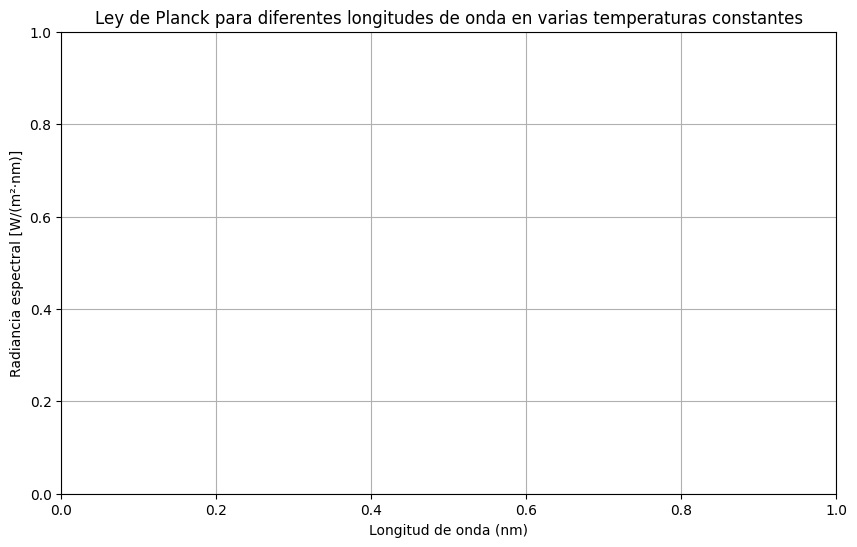

In [13]:
# Crear un array de longitudes de onda
longitudOnda = np.linspace(3.5e-7, 7.5e-7, 500) # en metros

# Crear un array de temperaturas
temperatura = np.linspace(300, 1000, 5) # en Kelvin

plt.figure(figsize=(10, 6))
plt.title('Ley de Planck para diferentes longitudes de onda en varias temperaturas constantes')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Radiancia espectral [W/(m²·nm)]')
plt.grid(True)

for t in temperatura:
  # Calcular la intensidad para cada longitud de onda
  intensidad = ley_planck(longitudOnda, temperatura)
  plt.plot(longitudOnda * 1e9, intensidad, label= f'T={t:.2f} K')

plt.legend()
plt.show()

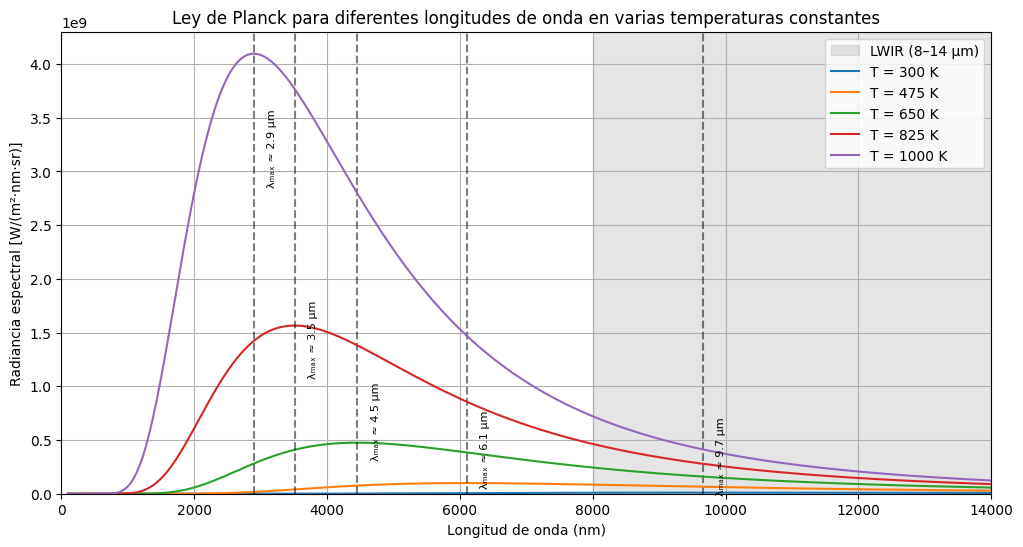

In [ ]:
# Crear un array de longitudes de onda (de 0.1 µm a 14 µm)
longitudOnda = np.linspace(100e-9, 14000e-9, 500)  # en metros

temperatura = np.linspace(300, 1000, 5)  # en Kelvin

plt.figure(figsize=(12, 6))
plt.title('Ley de Planck para diferentes longitudes de onda en varias temperaturas constantes')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Radiancia espectral [W/(m²·nm·sr)]')
plt.grid(True)

plt.axvspan(8000, 14000, color='gray', alpha=0.2, label='LWIR (8–14 µm)')

for t in temperatura:
    # Calcular la intensidad para cada longitud de onda
    intensidad = ley_planck(longitudOnda, t)
    plt.plot(longitudOnda * 1e9, intensidad, label=f'T = {t:.0f} K')

    # Calcular el pico de radiancia (desplazamiento de Wien)
    lambda_max = 2.89777e-3 / t  # en metros
    if 100e-9 <= lambda_max <= 14000e-9:  # solo si está dentro del rango de la gráfica
        plt.axvline(lambda_max * 1e9, color='black', linestyle='--', alpha=0.5)
        plt.text(lambda_max * 1e9 + 200, max(intensidad) * 0.7,
                 f'λₘₐₓ ≈ {lambda_max*1e6:.1f} µm', rotation=90, fontsize=8)

plt.legend()
plt.xlim(0, 14000)
plt.ylim(bottom=0)
plt.show()


# <font color="00CED1"> **Ley de Desplazamiento de Wien** </font><a name="tema3"></a>

La ley de Wien describe la relación entre la temperatura de un cuerpo negro y la longitud de onda donde este emite su máxima radiación.

La ley de Wien se describe de la siguiente manera:
$$ \lambda_{max} = \frac{b}{T} $$
Donde:
- $\lambda_{max}$ es la longitud de onda [m], donde el cuerpo negro emite su máxima radiación.
-$b$ es la constante de desplazamiento de Wien [m⋅K].
- $T$ es la temperatura absoluta del cuerpo negro [K].

In [ ]:
from scipy.constants import Wien as b
print(f"Constante de Wien: {b} m·K")

Constante de Wien: 0.0028977719551851727 m·K


In [ ]:
def ley_wien(T):  # T: temperatura [K]
    return b / T  # Retorna λ_max [m], b [m·K]

In [ ]:
def graficar_ley_wien(T):
    lambda_ = np.linspace(100e-9, 14000e-9, 500)  # de 100 nm a 14000 nm
    intensidad = ley_planck(lambda_, T)
    lambda_max = ley_wien(T)

    plt.figure(figsize=(10, 6))
    plt.plot(lambda_ * 1e9, intensidad, label=f'T = {T} K')
    plt.axvline(lambda_max * 1e9, color='r', linestyle='--', label=f'λ_max ≈ {lambda_max*1e9:.1f} nm')
    plt.title('Distribución espectral (Ley de Planck) y λ_max (Ley de Wien)')
    plt.xlabel('Longitud de onda (nm)')
    plt.ylabel('Radiancia espectral [W/(m²·nm·sr)]')
    plt.grid(True)
    plt.legend()
    plt.show()

# Slider interactivo
interact(graficar_ley_wien,
         T=FloatSlider(value=5800, min=300, max=10000, step=100, description='Temp (K):'));

interactive(children=(FloatSlider(value=5800.0, description='Temp (K):', max=10000.0, min=300.0, step=100.0), …

## <font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font> #<font color="#0000FF">3</font>** 💪</font>   

Modifica las longitudes de onda y temperaturas como desees, esta vez con el propósito de verificar experimentalmente la Ley de Wien.

**Nota**: Para lograr esto, es necesario almacenar los valores máximos de radiancia en un vector, y luego utilizar la función definida anteriormente para calcular las longitudes de onda correspondientes a esos máximos.

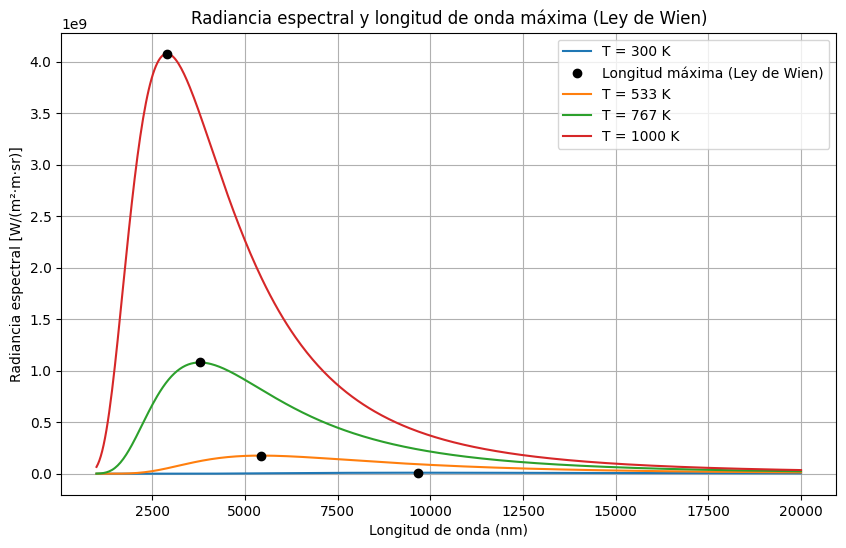

In [ ]:
# Crear un rango de longitudes de onda (en metros)
longitudes = np.linspace(350e-9, None, None)

# Crear una lista de temperaturas a analizar
temperaturas = np.linspace(None, None, None)

plt.figure(figsize=(10, 6))
plt.title("Radiancia espectral y longitud de onda máxima (Ley de Wien)")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Radiancia espectral [W/(m²·m·sr)]")
plt.grid(True)

primer_punto = True

# Graficar para cada temperatura
for T in temperaturas:
    # Calcula la radiancia espectral con la Ley de Planck
    radiancia = ley_planck(longitudes, T)

    # Calcula la longitud de onda máxima usando la Ley de Wien
    lambda_max_teorico = ley_wien(T)

    # Dibuja la curva
    plt.plot(longitudes * 1e9, radiancia, label=f'T = {T:.0f} K')

    # Marca el punto máximo
    if primer_punto:
        plt.plot(lambda_max_teorico * 1e9,
                 ley_planck(lambda_max_teorico, T),
                 'ko',
                 label='Longitud máxima (Ley de Wien)')
        primer_punto = False
    else:
        plt.plot(lambda_max_teorico * 1e9,
                 ley_planck(lambda_max_teorico, T),
                 'ko')

plt.legend()
plt.show()

# <font color="00CED1"> **Ley de Kirchoff para la emisividad** </font><a name="tema4"></a>


La Ley de Kirchhoff establece que la emisividad de un material a cierta temperatura y en cierta longitud de onda $\lambda$ será igual a su absorptividad cuando se encuentra en equilibrio térmico:

$$ \epsilon(\lambda, T) = \alpha(\lambda, T)$$

Donde:

- $\epsilon(\lambda, T)$: emisividad espectral adimensional (sin unidades), toma valores entre 0 y 1.

- $\alpha(\lambda, T)$: absorptividad espectral adimensional (sin unidades), también entre 0 y 1.

- $\lambda$: longitud de onda [m]

- $T$: temperatura absoluta [K]

La emisividad $\epsilon$ es la razón entre la radiación emitida por una superficie y la radiación que emitiría un cuerpo negro a la misma temperatura y longitud de onda.

La absorptividad $\alpha$ es la fracción de la radiación incidente que una superficie absorbe, en comparación con un cuerpo negro.

**Ejemplo visual de absorptividad, emisividad y transmitancia: **
<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/9/9b/Human-Visible.jpg" alt="Visible Spectrum" height="300px" />
  <img src="https://upload.wikimedia.org/wikipedia/commons/4/44/Human-Infrared.jpg" alt="Infrared Spectrum" height="300px" />
</p>

El plástico negro es transparente en LWIR, por eso en cámaras térmicas se ve oscuro, ya que no bloquea la radiación del fondo.

El vidrio es opaco en LWIR; no la transmite, sino que refleja la radiación.



## <font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font> #<font color="#0000FF">4</font>** 💪</font>  
Observa cómo cambian las curvas espectrales según los materiales:
* ¿Cuál de los materiales se comporta más parecido a un cuerpo negro?
* ¿Qué implicaciones tiene esto en aplicaciones como la detección térmica o el diseño de recubrimientos térmicos?


<h3>Tabla: Emisividad de algunos materiales a temperatura ambiente (~300 K)</h3>

<table style="font-size:16px">
  <tr>
    <th>Material</th>
    <th>Emisividad (ϵ)</th>
    <th>Observaciones</th>
  </tr>
  <tr>
    <td>Piel humana</td>
    <td>0.98</td>
    <td>Muy cercana a cuerpo negro</td>
  </tr>
  <tr>
    <td>Metal (pulido)</td>
    <td>0.10</td>
    <td>Muy reflectante, baja emisión térmica</td>
  </tr>
  <tr>
    <td>Madera</td>
    <td>0.85</td>
    <td>Alta emisividad, depende de la humedad</td>
  </tr>
  <tr>
    <td>Vidrio</td>
    <td>0.90</td>
    <td>Alta emisividad en el infrarrojo</td>
  </tr>
</table>




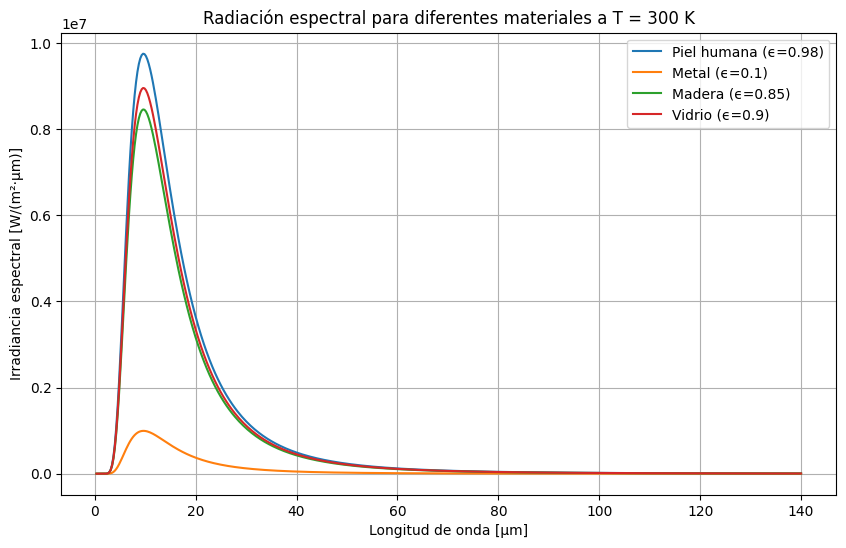

In [10]:
def ley_planck(longitudOnda, temperatura: float, emisividad=1): #Longitud de onda [m], temperatura [K], emisividad

    # Exponente del denominador
    exponent = (h * c) / (longitudOnda * k * temperatura)

    #Retorna la radiancia espectral, multiplicada por la emisividad
    return emisividad * (2 * h * c**2) / (longitudOnda**5) * (1 / (np.exp(exponent) - 1))

# Temperatura fija del cuerpo
temperatura = 300  # [K]

longitud_onda = np.linspace(350e-9, 140000e-9, 500)  # en metros [m]

materiales = {
    "Piel humana": 0.98,  # Altamente emisiva
    "Metal": 0.10,        # Poco emisivo
    "Madera": 0.85,       # Emisividad media
    "Vidrio": 0.90        # También alto
}

plt.figure(figsize=(10, 6))

# Para cada material, calcular y graficar su curva de emisión
for material, emisividad in materiales.items():
    intensidad = ley_planck(longitud_onda, temperatura, emisividad)
    # Convertimos la longitud de onda a micrómetros multiplicando por 1e6
    plt.plot(longitud_onda * 1e6, intensidad, label=f"{material} (ϵ={emisividad})")

plt.title(f'Radiación espectral para diferentes materiales a T = {temperatura} K')
plt.xlabel('Longitud de onda [μm]')  # micrómetros
plt.ylabel('Irradiancia espectral [W/(m²·μm)]')  # con unidad convertida
plt.grid(True)
plt.legend()
plt.show()